In [106]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import gmaps
import os
import scipy.stats as st
from scipy.stats import linregress
%matplotlib notebook
import seaborn as sns

# Import API key
from api_keys import g_key

# Save path to csv file in a variable
data_file="../Resources/AustraliaDataScienceJobs.csv"

# Read data file using pandas library
data_file_df=pd.read_csv(data_file,encoding="UTF-8")

# Display dataframe
df=pd.DataFrame(data_file_df)
df.head()

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,95917,80000,115000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Remove unwanted columns
cols=['Url','Job Descriptions']
data_science=df.drop(cols,axis=1)
data_science

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,Helicopter Pilot,Subiaco,Rocketmine,80000,70000,90000,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2084,Graduate Environmental Specialist,Perth,Lynas Corporation,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2085,Graduate Environmental Specialist,Perth,Lynas Corporation,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Identify incomplete rows
data_science.count()

Job Title                        2085
Job Location                     2088
Company                          2088
Estimate Base Salary             2088
Low Estimate                     2088
High Estimate                    2088
Company Size                     1907
Company Type                     1907
Company Sector                   1521
Company Founded                  1198
Company Industry                 1521
Company Revenue                  1907
Company Rating                   1777
Company Friend Reccomendation    1732
Company CEO Approval             1324
Companny Number of Rater         1777
Company Career Opportinities     1770
Compensation and Benefits        1770
Company Culture and Values       1770
Company Senior Management        1770
Company Work Life Balance        1770
Country                          2088
State                            2088
python_yn                        2088
r_yn                             2088
sql_yn                           2088
java_yn     

In [109]:
# Drop rows with missing information and create a new dataframe
data_science_df=data_science.dropna(how='any')
data_science_df=pd.DataFrame(data_science_df)
data_science_df.head()

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Verify Cleanup
data_science_df.count()

Job Title                        1112
Job Location                     1112
Company                          1112
Estimate Base Salary             1112
Low Estimate                     1112
High Estimate                    1112
Company Size                     1112
Company Type                     1112
Company Sector                   1112
Company Founded                  1112
Company Industry                 1112
Company Revenue                  1112
Company Rating                   1112
Company Friend Reccomendation    1112
Company CEO Approval             1112
Companny Number of Rater         1112
Company Career Opportinities     1112
Compensation and Benefits        1112
Company Culture and Values       1112
Company Senior Management        1112
Company Work Life Balance        1112
Country                          1112
State                            1112
python_yn                        1112
r_yn                             1112
sql_yn                           1112
java_yn     

In [111]:
# Checking the number of rows and columns
data_science_df.shape

(1112, 51)

In [112]:
# Checking the datatypes of the columns
data_science_df.dtypes

Job Title                         object
Job Location                      object
Company                           object
Estimate Base Salary               int64
Low Estimate                       int64
High Estimate                      int64
Company Size                      object
Company Type                      object
Company Sector                    object
Company Founded                  float64
Company Industry                  object
Company Revenue                   object
Company Rating                   float64
Company Friend Reccomendation    float64
Company CEO Approval             float64
Companny Number of Rater         float64
Company Career Opportinities     float64
Compensation and Benefits        float64
Company Culture and Values       float64
Company Senior Management        float64
Company Work Life Balance        float64
Country                           object
State                             object
python_yn                          int64
r_yn            

In [113]:
# To find the non-number/unusual values(optional)
data_science_df.max()

Job Title                              Visualisation Specialist
Job Location                                         Wollongong
Company                                                      bp
Estimate Base Salary                                     295000
Low Estimate                                             241000
High Estimate                                            349000
Company Size                                            Unknown
Company Type                     Subsidiary or Business Segment
Company Sector                       Transportation & Logistics
Company Founded                                          2020.0
Company Industry                                      Wholesale
Company Revenue                        Unknown / Non-Applicable
Company Rating                                              4.9
Company Friend Reccomendation                             100.0
Company CEO Approval                                      100.0
Companny Number of Rater                

In [114]:
# Anam
# Find the unique total of companies
total_unique_companies=data_science_df['Company'].value_counts()
# Companies having max number of jobs (top 6)
max_company_jobs=total_unique_companies.iloc[0:6]
max_company_jobs

Deloitte             139
CSIRO                 78
Give A Grad A Go      60
Indeed                55
ANZ Banking Group     42
Commonwealth Bank     32
Name: Company, dtype: int64

<IPython.core.display.Javascript object>


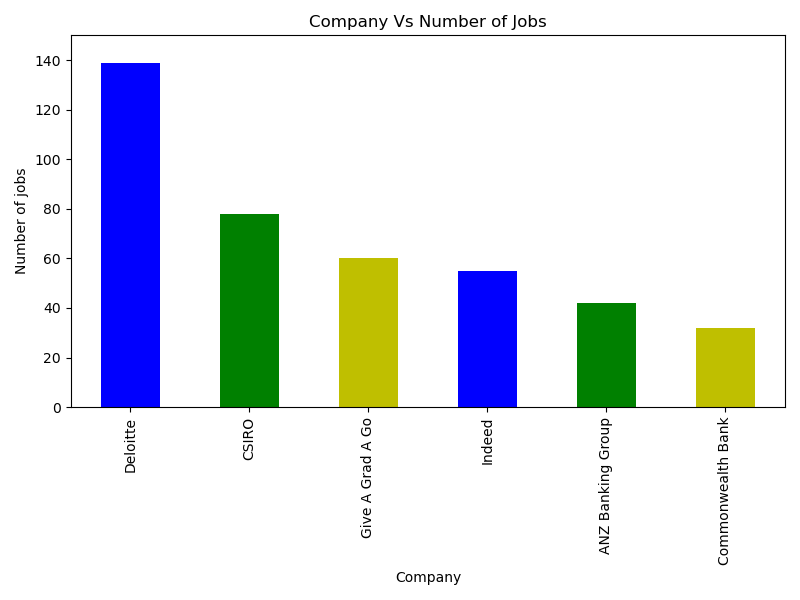

In [120]:
# Anam
# Bar plot displaying top 6 companies with max number of jobs
plt.figure(figsize=(8, 6))
max_company_jobs.plot.bar(color=['b','g','y'])
plt.ylim(0, 150)
plt.title("Company Vs Number of Jobs")
plt.xlabel("Company")
plt.ylabel("Number of jobs")
plt.tight_layout()

In [177]:
# Anam
# Companies having greatest Estimate Low Salary
average_estimate_low=data_science_df.groupby(["Company"]).mean()[["Low Estimate"]]
top_low_salary=average_estimate_low.sort_values("Low Estimate",ascending=False)
# Top 6 companies in terms of greatest estimate low salary (mean)
top_low_estimate=top_low_salary.iloc[0:6]
# mapping
top_low_estimate["Low Estimate"]=top_low_estimate["Low Estimate"].map("${:,.2f}".format)
top_low_estimate

C:\Users\User\AppData\Local\Temp\ipykernel_2732\1687284541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_low_estimate["Low Estimate"]=top_low_estimate["Low Estimate"].map("${:,.2f}".format)


,Low Estimate
Company,
Profusion Group,"$200,000.00"
Indeed,"$175,545.45"
MALTEM Australia,"$170,000.00"
Techtronic Industries (TTI),"$168,000.00"
Palo Alto Networks,"$153,000.00"
Goodman Fielder,"$149,000.00"


<IPython.core.display.Javascript object>


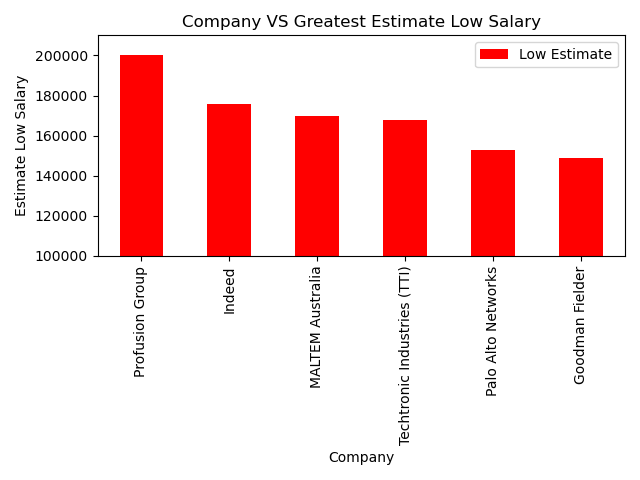

In [167]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate low salary (mean)
# plt.figure(figsize=(8, 6))
top_low_estimate.plot.bar(color='r')
plt.ylim(100000, 210000)
plt.title("Company VS Greatest Estimate Low Salary")
plt.xlabel("Company")
plt.ylabel("Estimate Low Salary")
plt.tight_layout()

In [195]:
# Anam
# Companies having greatest Estimate Base Salary
average_estimate_base=data_science_df.groupby(["Company"]).mean()[["Estimate Base Salary"]]
top_base_salary=average_estimate_base.sort_values("Estimate Base Salary",ascending=False)
# Top 6 companies in terms of greatest base estimate salary (mean)
top_base_estimate=top_base_salary.iloc[0:6]
# mapping
top_base_estimate["Estimate Base Salary"]=top_base_estimate["Estimate Base Salary"].map("${:,.2f}".format)
top_base_estimate

C:\Users\User\AppData\Local\Temp\ipykernel_2732\3744348745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_base_estimate["Estimate Base Salary"]=top_base_estimate["Estimate Base Salary"].map("${:,.2f}".format)


,Estimate Base Salary
Company,
Indeed,"$215,145.45"
Profusion Group,"$200,000.00"
Techtronic Industries (TTI),"$181,275.00"
MALTEM Australia,"$170,000.00"
Palo Alto Networks,"$165,476.00"
Microsoft,"$157,901.00"


<IPython.core.display.Javascript object>


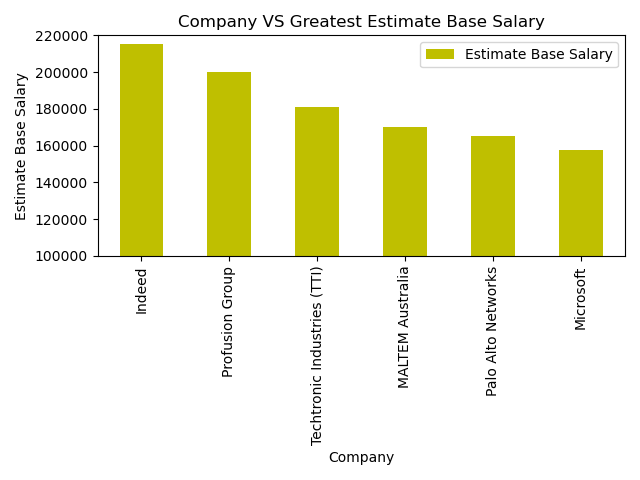

In [169]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate base salary (mean)
# plt.figure(figsize=(8, 6))
top_base_estimate.plot.bar(color='y')
plt.ylim(100000, 220000)
plt.title("Company VS Greatest Estimate Base Salary")
plt.xlabel("Company")
plt.ylabel("Estimate Base Salary")
plt.tight_layout()

In [196]:
# Anam
# Companies having greatest Estimate High Salary
average_estimate_high=data_science_df.groupby(["Company"]).mean()[["High Estimate"]]
top_high_salary=average_estimate_high.sort_values("High Estimate",ascending=False)
# Top 6 companies in terms of greatest high estimate salary (mean)
top_high_estimate=top_high_salary.iloc[0:6]
# mapping
top_high_estimate["High Estimate"]=top_high_estimate["High Estimate"].map("${:,.2f}".format)
top_high_estimate

C:\Users\User\AppData\Local\Temp\ipykernel_2732\548066748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_high_estimate["High Estimate"]=top_high_estimate["High Estimate"].map("${:,.2f}".format)


,High Estimate
Company,
Indeed,"$254,745.45"
Profusion Group,"$200,000.00"
United Nations,"$199,000.00"
Techtronic Industries (TTI),"$196,000.00"
Palo Alto Networks,"$179,000.00"
Nearmap,"$179,000.00"


<IPython.core.display.Javascript object>


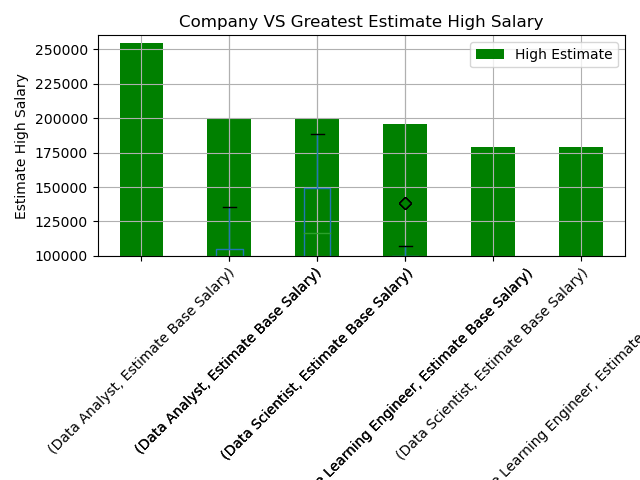

In [171]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate high salary (mean)
top_high_estimate.plot.bar(color='g')
plt.ylim(100000, 260000)
plt.title("Company VS Greatest Estimate High Salary")
plt.xlabel("Company")
plt.ylabel("Estimate High Salary")
plt.tight_layout()

In [172]:
# Anam
# Calculating number of jobs for each job title
title_df=data_science_df['Job Title'].value_counts()
title_df

Data Scientist                   155
Data Analyst                     114
Machine Learning Engineer         71
Clinical Research Associate       43
Graduate Research Fellow          41
                                ... 
Platform Engineer                  1
Planning Analyst                   1
Geologist                          1
Lead Product Specialist            1
Information Security Engineer      1
Name: Job Title, Length: 148, dtype: int64

In [173]:
# Anam
# Top 3 job titles with highest number of jobs 
top_three=list(title_df.iloc[0:3].index)

# Finding Estimate Base Salary for top three job titles
top_three=data_science_df[data_science_df["Job Title"].isin(top_three)][["Job Title", "Estimate Base Salary"]]

# Groupby top three job titles with estimate base salary
grouped_top_three=top_three.groupby("Job Title")

# Box plot
green_diamond = dict(markerfacecolor='g', marker='D')
grouped_top_three.boxplot("Estimate Base Salary", rot=45, flierprops=green_diamond)

<AxesSubplot:title={'center':'Company VS Greatest Estimate High Salary'}, xlabel='Company', ylabel='Estimate High Salary'>

In [199]:
# Anam
# 7: Find the unique job titles and extract top 5 and bottom 5 job titles in terms of salary
# Excluding odd titles
exclusion_list=["Housekeeper","Brewer Trainee","Technician"]
exluding_titles = data_science_df[~data_science_df["Job Title"].isin(exclusion_list)]
# Sorting job titles in terms of estimate base salary
job_title=exluding_titles.groupby(["Job Title"]).mean()[["Estimate Base Salary"]]
title_salary=job_title.sort_values("Estimate Base Salary", ascending=False)
title_salary

,Estimate Base Salary
Job Title,
"Technical Fellow, Job Seeker",295000.000000
Senior Product Manager,209000.000000
Graduate Software Developer,196115.000000
Software Engineer,185573.307692
Lead Analytics Consultant,181275.000000
...,...
Planning Analyst,61631.000000
Office Administrator,55561.000000
Lead Group Manager,54387.000000


In [208]:
# Anam
# Top 5 job titles with highest salaries
top_five_titles=title_salary.iloc[0:5]
# top_five_titles["Estimate Base Salary"]=top_five_titles["Estimate Base Salary"].map("${:,.2f}".format)
top_five_titles

,Estimate Base Salary
Job Title,
"Technical Fellow, Job Seeker",295000.000000
Senior Product Manager,209000.000000
Graduate Software Developer,196115.000000
Software Engineer,185573.307692
Lead Analytics Consultant,181275.000000


<IPython.core.display.Javascript object>


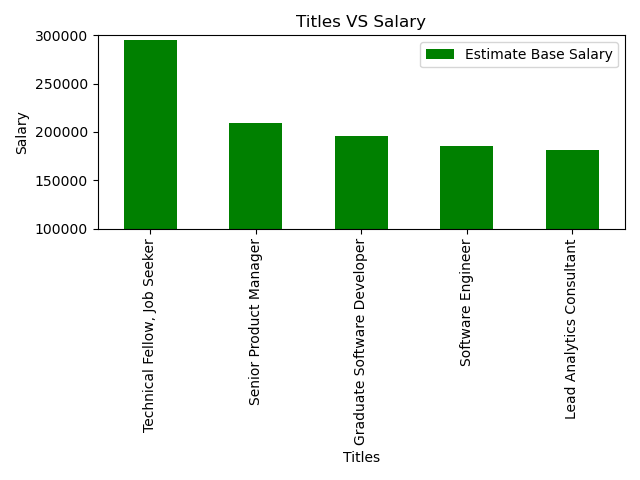

In [211]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate high salary (mean)
top_five_titles.plot.bar(color='g')
plt.ylim(100000, 300000)
plt.title("Titles VS Salary")
plt.xlabel("Titles")
plt.ylabel("Salary")
plt.tight_layout()

In [213]:
# Bottom 5 job titles with lowest salaries
bottom_five_titles=title_salary.iloc[0:5]
# bottom_five_titles["Estimate Base Salary"]=bottom_five_titles["Estimate Base Salary"].map("${:,.2f}".format)
bottom_five_titles

,Estimate Base Salary
Job Title,
"Technical Fellow, Job Seeker",295000.000000
Senior Product Manager,209000.000000
Graduate Software Developer,196115.000000
Software Engineer,185573.307692
Lead Analytics Consultant,181275.000000


<IPython.core.display.Javascript object>


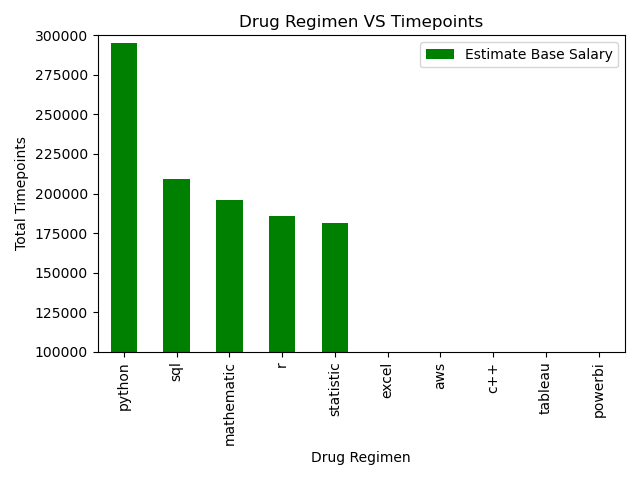

In [214]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate high salary (mean)
bottom_five_titles.plot.bar(color='g')
plt.ylim(100000, 300000)
plt.title("Titles VS Salary")
plt.xlabel("Titles")
plt.ylabel("Salary")
plt.tight_layout()

In [215]:
# Anam
# Top companies in terms of employee satisfaction
employee_satisfaction_opp=data_science_df.groupby(["Company"]).mean()["Company Career Opportinities"]
employee_satisfaction_benefits=data_science_df.groupby(["Company"]).mean()["Compensation and Benefits"]
employee_satisfaction_values=data_science_df.groupby(["Company"]).mean()["Company Culture and Values"]
employee_satisfaction_life=data_science_df.groupby(["Company"]).mean()["Company Work Life Balance"]                                                                 
employee_satisfaction=(employee_satisfaction_opp+employee_satisfaction_benefits+employee_satisfaction_values+employee_satisfaction_life)/4
# Employee satisfaction
employee_satisfaction=employee_satisfaction.sort_values(ascending=False)
top_employee_satisfaction=employee_satisfaction.iloc[0:10]
bottom_employee_satisfaction=employee_satisfaction.iloc[-10:]


In [216]:
# Anam
# Bar plot displaying top companies in terms of employee satisfaction
top_employee_satisfaction.plot.bar(color='b')
plt.title("Company VS Employee Satisfaction")
plt.xlabel("Company")
plt.ylabel("Satisfaction Rating")
plt.tight_layout()

In [217]:
# Anam
# 13: Count for each technical skill and then find top 10
skills_df=data_science_df[['python_yn','r_yn','sql_yn','java_yn','julia_yn','scala_yn','c_yn','c++_yn','javascript_yn','spark_yn','hadoop_yn','matlab_yn','sas_yn','git_yn','excel_yn','nosql_yn','aws_yn','mongodb_yn','cassandra_yn','hive_yn','bigml_yn','tableau_yn','powerbi_yn','nlp_yn','pytorch_yn','tensorflow_yn','mathematic_yn','statistic_yn']]
skills_df.columns=['python','r','sql','java','julia','scala','c','c++','javascript','spark','hadoop','matlab','sas','git','excel','nosql','aws','mongodb','cassandra','hive','bigml','tableau','powerbi','nlp','pytorch','tensorflow','mathematic','statistic']

sum_df=skills_df.sum()
top=sum_df.sort_values(ascending=False)
top_ten_skills=top.iloc[0:10]
top_ten_skills

python        386
sql           338
mathematic    218
r             169
statistic     164
excel         162
aws           133
c++            98
tableau        94
powerbi        86
dtype: int64

In [218]:
# Anam
# plotting top ten in demand skills
top_ten_skills.plot.bar(color='b')
plt.title("Drug Regimen VS Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.tight_layout()

In [45]:
# Nishant
# 8: Find the states with the highest and lowest number of job opportunities by using groupby method
grouped_state_jobs = data_science_df.groupby(["State"])["Job Title"]
state_jobs=grouped_state_jobs.count()
state_jobs

State
New South Wales       385
Northern Territory      6
Queensland            150
South Australia        68
Tasmania               12
Victoria              377
Western Australia     114
Name: Job Title, dtype: int64

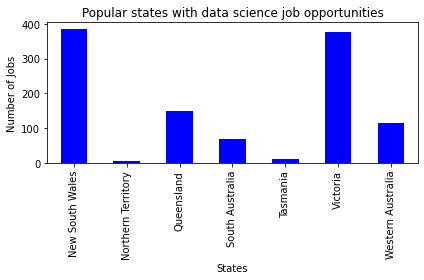

In [46]:
# # Nishant
# #Creating pie charts for data science job oppertunities by states
state_jobs.plot.bar(color='b')
plt.title("Popular states with data science job opportunities")
plt.xlabel("States")
plt.ylabel("Number of Jobs")
plt.tight_layout()

In [47]:
# Nishant
# 9: The popular company type and then make a pie chart
data_science_df['Company Type'] = data_science_df['Company Type'].replace(['Government'],'Company - Public')
private=data_science_df.loc[data_science_df['Company Type']=="Company - Private"]
public=data_science_df.loc[data_science_df['Company Type'] =="Company - Public"]
merged_company_type=pd.concat([private, public], ignore_index=True, sort=False)
company_df = merged_company_type.groupby(["Company Type"])["Company"]
company_type=company_df.count()
company_type

Company Type
Company - Private    425
Company - Public     544
Name: Company, dtype: int64

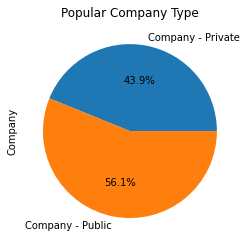

In [48]:
# Nishant
# #Creating pie charts for data science job opportunities by popular company types
company_type.plot.pie(autopct= "%1.1f%%")
plt.title("Popular Company Type")
plt.show()

In [49]:
# Anam
# public vs private estimate base salary
# company_df = merged_company_type.groupby(["Company Type"])["Estimate Base Salary"]
# # company_type=company_df.count()
# # company_type
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, 
# #             alpha=0.50)
# company_df.plot.bar(color='b')
# plt.title("Company VS Employee Satisfaction")
# plt.xlabel("Company")
# plt.ylabel("Satisfaction Rating")
# plt.tight_layout()

In [50]:
# Nishant
#remove string from column
data_science_df['Company Size Int'] = data_science_df['Company Size'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [51]:
# Nishant
# 10: Compare the size of the company using the bin and compare the salaries
#Creating bins for size of companies
bins = [0, 1000, 5000, 11000]

#Creating labels
# MNC=Multi-National Companies
group_size = ["Smaller", "Medium", "MNC"]

In [52]:
# Nishant
data_science_df["Size Of Company"] = pd.cut(data_science_df["Company Size Int"], bins, labels=group_size, include_lowest=True)
data_science_df

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,1,0,10000.0,MNC
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,Data Scientist,Perth,GHD,97279,92000,103000,5001 to 10000 Employees,Company - Private,Management & Consulting,1928.0,...,0,0,1,0,0,0,0,0,500110000.0,NaN
2078,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2079,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,0,10000.0,MNC


In [53]:
# Nishant
# 10: compare the salaries using the bin 
#creating bins for salary slot
bins = [0, 40000, 60000, 80000, 120000, 150000, 250000]
#creating labels
group_salary = ["Lowest", "Lower", "Average", "Good", "Higher", "Highest"]

In [54]:
# Nishant
data_science_df["Estimated Salary"] = pd.cut(data_science_df["Estimate Base Salary"], bins, labels=group_salary, include_lowest=True)
data_science_df

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company,Estimated Salary
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,1,0,10000.0,MNC,Good
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Good
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Good
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Good
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,10000.0,MNC,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,Data Scientist,Perth,GHD,97279,92000,103000,5001 to 10000 Employees,Company - Private,Management & Consulting,1928.0,...,0,1,0,0,0,0,0,500110000.0,NaN,Good
2078,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest
2079,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest
2086,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,10000.0,MNC,Higher


In [55]:
# John
# 11: Find top 15 and bottom 15 companies in terms of company ratings and employee satisfaction by setting conditions over 4.0

#Identifying Top 10 company

top_condition_rating = (data_science_df["Company Rating"]>=4)
top_condition_career = (data_science_df["Company Career Opportinities"]>=4)
top_condition_benefits = (data_science_df["Compensation and Benefits"]>=4)
top_condition_culture = (data_science_df["Company Culture and Values"]>=4)
top_condition_worklife = (data_science_df["Company Work Life Balance"]>=4)

top_conditional_df = data_science_df.loc[top_condition_rating & top_condition_career & 
                                         top_condition_benefits & top_condition_culture & top_condition_worklife].dropna()

t_company_df = top_conditional_df.groupby(["Company"]).mean()[["Company Rating","Company Career Opportinities","Compensation and Benefits","Company Culture and Values","Company Work Life Balance"]]

top_company_df= t_company_df.sort_values(["Company Rating"], ascending =False)

top_company_df.head(10)

,Company Rating,Company Career Opportinities,Compensation and Benefits,Company Culture and Values,Company Work Life Balance
Company,,,,,
Profusion Group,4.9,4.2,4.9,4.9,4.7
Give A Grad A Go,4.8,4.6,4.5,4.7,4.7
Microsoft,4.4,4.2,4.1,4.4,4.2
Avanade,4.3,4.3,4.0,4.5,4.1


In [56]:
# John
#Identifying bottom 10 company

bottom_condition_rating = (data_science_df["Company Rating"]<4)
bottom_condition_career = (data_science_df["Company Career Opportinities"]<4)
bottom_condition_benefits = (data_science_df["Compensation and Benefits"]<4)
bottom_condition_culture = (data_science_df["Company Culture and Values"]<4)
bottom_condition_worklife = (data_science_df["Company Work Life Balance"]<4)

bottom_conditional_df = data_science_df.loc[bottom_condition_rating & bottom_condition_career & 
                                         bottom_condition_benefits & bottom_condition_culture & bottom_condition_worklife].dropna()

b_company_df = bottom_conditional_df.groupby(["Company"]).mean()[["Company Rating","Company Career Opportinities","Compensation and Benefits","Company Culture and Values","Company Work Life Balance"]]

bottom_company_df= b_company_df.sort_values(["Company Rating"], ascending =True)

bottom_company_df.head(10)

,Company Rating,Company Career Opportinities,Compensation and Benefits,Company Culture and Values,Company Work Life Balance
Company,,,,,
Australian Laboratory Services,3.1,2.7,2.6,3.0,2.9
Tibra Capital,3.1,2.7,2.8,2.5,2.7
DAC Enterprises Pty Ltd,3.3,3.3,3.6,3.2,2.7
Kraft Heinz Company,3.4,3.5,3.7,3.1,2.8
State Street Corporation,3.4,3.3,3.1,3.4,3.3
WooliesX,3.5,3.4,3.3,3.4,3.5
Toll Global Express,3.5,3.3,3.1,3.3,3.4
Techtronic Industries (TTI),3.5,3.8,3.9,3.5,3.7
Schlumberger,3.5,3.8,3.9,3.8,3.1


In [57]:
# John
# 12: Define metro and regional by using conditional statements and find the number of opportunities in metro vs regional

filtered_data_science = (data_science_df["Job Location"]!= "Australia")

updated_data_science_df = data_science_df.loc[filtered_data_science]

per_job_location = updated_data_science_df.groupby(["Job Location"]).mean()["Estimate Base Salary"]

per_job_location

round(per_job_location,2)

Job Location
Adelaide              97493.34
Alice Springs        115000.00
Bella Vista          105365.00
Bowen Hills           84905.00
Braeside              64092.00
Bridgetown           147860.00
Brisbane              95443.99
Broadbeach           154417.00
Bunbury              169706.00
Darlinghurst          97417.00
Darwin               100623.00
East Brisbane         64607.50
Eight Mile Plains     85000.00
Fortitude Valley      93579.50
Hawthorn East        118481.00
Helensvale           155000.00
Hobart               102885.22
Jandakot             135861.00
Melbourne             93768.35
Mile End              79704.50
Mulgrave              75888.77
Murarrie              54690.00
Newcastle             86983.00
North Shore          116841.00
North Sydney          94107.00
Perth                102492.30
Richmond             137392.00
Smithton              55561.00
Southbank             86920.54
Stafford              54652.00
Sydney               100588.51
Thebarton             7147

In [58]:
# John
# 12: Define metro and regional by using conditional statements and find the number of opportunities in metro vs regional

list_regional_location = ["Bella Vista","Bowen Hills", "Braeside", "Bridgetown", "Bunbury","Helensvale","Jandakot","Mile End","Smithton","Thebarton","Uxbridge","Waurn Ponds","Wollongong"]



regional_location = updated_data_science_df[updated_data_science_df["Job Location"].isin(list_regional_location)]


metro_location = updated_data_science_df[~updated_data_science_df["Job Location"].isin(list_regional_location)]


In [59]:
# John
regional_location['Location Type'] = 'Regional'

metro_location['Location Type'] = 'Metro'

merged_location= pd.concat([metro_location, regional_location], ignore_index=True, sort=False)
merged_location

C:\Users\User\AppData\Local\Temp\ipykernel_2732\809714705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regional_location['Location Type'] = 'Regional'
C:\Users\User\AppData\Local\Temp\ipykernel_2732\809714705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro_location['Location Type'] = 'Metro'


,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company,Estimated Salary,Location Type
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,1,0,10000.0,MNC,Good,Metro
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,10000.0,MNC,Good,Metro
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,10000.0,MNC,Good,Metro
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,10000.0,MNC,Good,Metro
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,10000.0,MNC,Good,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,10000.0,MNC,Higher,Regional
1055,Program Manager,Bridgetown,United Nations,147860,110000,199000,10000+ Employees,Company - Public,Government & Public Administration,1945.0,...,0,0,0,0,0,0,10000.0,MNC,Higher,Regional
1056,Program Manager,Bridgetown,United Nations,147860,110000,199000,10000+ Employees,Company - Public,Government & Public Administration,1945.0,...,0,0,0,0,0,0,10000.0,MNC,Higher,Regional
1057,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,10000.0,MNC,Higher,Regional


In [60]:
# John
overall_location_salary = merged_location.groupby(["Location Type"]).mean()["Estimate Base Salary"]
overall_location_salary

round(overall_location_salary,2)

Location Type
Metro        96642.79
Regional    114440.10
Name: Estimate Base Salary, dtype: float64

In [61]:
# John
regional_salary = regional_location.groupby(["Job Location"]).mean()["Estimate Base Salary"]
regional_salary
round(regional_salary,2)

Job Location
Bella Vista    105365.0
Bowen Hills     84905.0
Braeside        64092.0
Bridgetown     147860.0
Bunbury        169706.0
Helensvale     155000.0
Jandakot       135861.0
Mile End        79704.5
Smithton        55561.0
Thebarton       71473.5
Uxbridge        95331.0
Waurn Ponds     68356.0
Wollongong     114351.5
Name: Estimate Base Salary, dtype: float64

In [62]:
# John
metro_salary = metro_location.groupby(["Job Location"]).mean()["Estimate Base Salary"]
metro_salary
round(metro_salary,2)

Job Location
Adelaide              97493.34
Alice Springs        115000.00
Brisbane              95443.99
Broadbeach           154417.00
Darlinghurst          97417.00
Darwin               100623.00
East Brisbane         64607.50
Eight Mile Plains     85000.00
Fortitude Valley      93579.50
Hawthorn East        118481.00
Hobart               102885.22
Melbourne             93768.35
Mulgrave              75888.77
Murarrie              54690.00
Newcastle             86983.00
North Shore          116841.00
North Sydney          94107.00
Perth                102492.30
Richmond             137392.00
Southbank             86920.54
Stafford              54652.00
Sydney               100588.51
Name: Estimate Base Salary, dtype: float64

In [66]:
# John
#Top 10 locations for data science jobs

def bar_plot(dataframe, column_name, num, Title, Xlabel):
  plt.figure(figsize=(15,7))
  color = plt.cm.Paired(np.arange(len(dataframe)))
  dataframe[column_name].value_counts().head(num).plot.bar(color=color, rot=90)
  plt.title(Title, fontsize=15)
  plt.xlabel(Xlabel, fontsize=15)
  plt.ylabel("Count", fontsize=15)
  plt.xticks(fontsize=10, rotation=80)
  plt.yticks(fontsize=10)

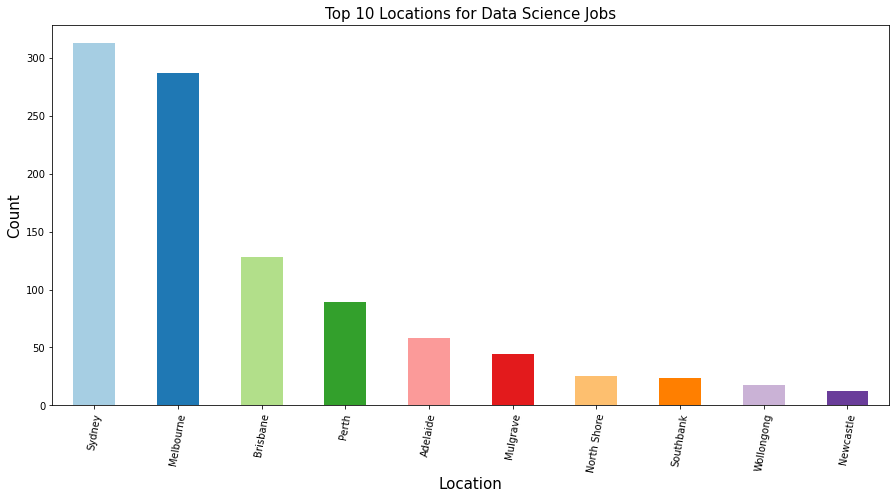

In [64]:
# John
Title = "Top 10 Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(updated_data_science_df, 'Job Location', 10, Title, Xlabel)

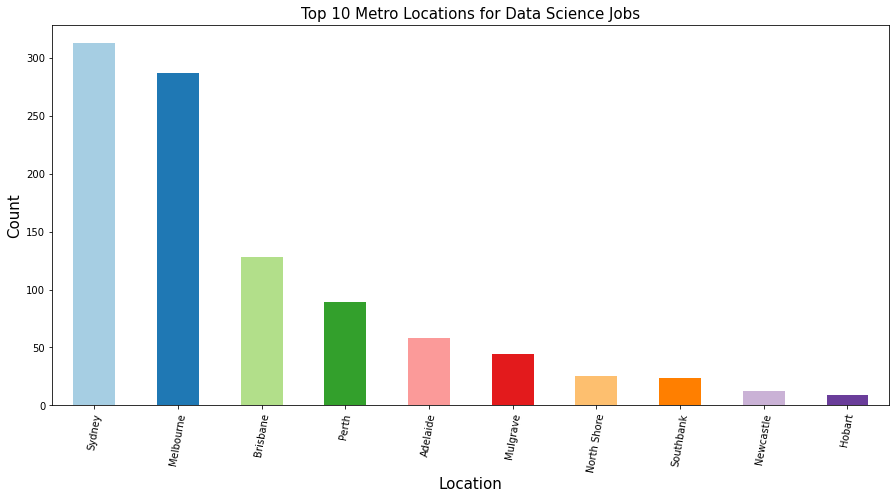

In [65]:
# John
Title = "Top 10 Metro Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(metro_location, 'Job Location', 10, Title, Xlabel)

In [ ]:
# John
Title = "Top 10 Regional Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(regional_location, 'Job Location', 10, Title, Xlabel)

In [ ]:
# John
st.pearsonr(company_data['Company Rating'],company_data['Estimate Base Salary'])[0]
correlation = st.pearsonr(company_data['Company Rating'],company_data['Estimate Base Salary'])[0]
correlation 

In [ ]:
# John
company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]


company_data = company_rating.groupby(['Company']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = company_data ['Company Rating']
y_values = company_data['Estimate Base Salary']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(company_data['Company Rating'],company_data['Estimate Base Salary'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(company_data ['Company Rating'],company_data['Estimate Base Salary'], deg=1)
# Plot regression line
ax.plot(company_data['Company Rating'], a + b * company_data ['Company Rating'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(4.6,120000),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Company Rating')
plt.ylabel('Estimate Base Salary')
plt.title("Average company rating vs. estimated base salary")

print(f"""The correlation for Average company rating vs. estimated base salary is {(correlation)}.""")

In [ ]:
# John
st.pearsonr(company_data['Company Rating'],company_data['Compensation and Benefits'])[0]
correlation = st.pearsonr(company_data['Company Rating'],company_data['Compensation and Benefits'])[0]
correlation 

In [ ]:
# John
company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]


company_data = company_rating.groupby(['Company']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = company_data ['Company Rating']
y_values = company_data['Compensation and Benefits']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(company_data['Company Rating'],company_data['Compensation and Benefits'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(company_data ['Company Rating'],company_data['Compensation and Benefits'], deg=1)
# Plot regression line
ax.plot(company_data['Company Rating'], a + b * company_data ['Company Rating'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(2.5,4.0),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Company Rating')
plt.ylabel('Compensation and Benefits')
plt.title("Average company rating vs. Compensation and Benefits rating")

print(f"""The correlation for Average company rating vs. Compensation and Benefits rating is {(correlation)}.""")

In [ ]:
# John
# 14: Bonus: Try using gmaps API to create a heatmap that we can use to visualize which states have more employment opportunities when it comes to data science.